In [242]:
import pandas
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from matplotlib import pyplot

In [243]:
dataset = pandas.read_csv("housing.csv", sep='\\s+')

X = dataset[dataset.columns.difference(["MEDV"])]
target = dataset["MEDV"]

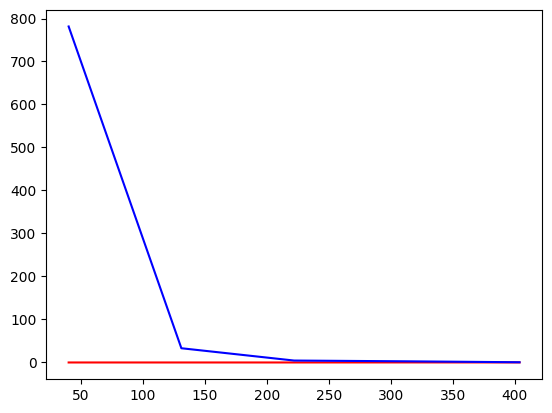

In [244]:
regression = LinearRegression()
regression.fit(X, target)

predicted = regression.predict(X)

train_sizes, train_scores, test_scores = learning_curve(regression, X, target, train_sizes=np.linspace(0.1, 1, 5))

ax = pyplot.subplot()
#ax.plot(train_sizes, np.mean(train_scores, axis=1))
ax.plot(train_sizes, -train_scores.mean(axis = 1), color='r')
ax.plot(train_sizes, -test_scores.mean(axis = 1), color='b')

Как можно заметить, при размере выборки до примерно полутораста точность модели очень низкая и в этом случае ее можно считать недообученной. Значение целевого показателя метрики MSE очень низкое.

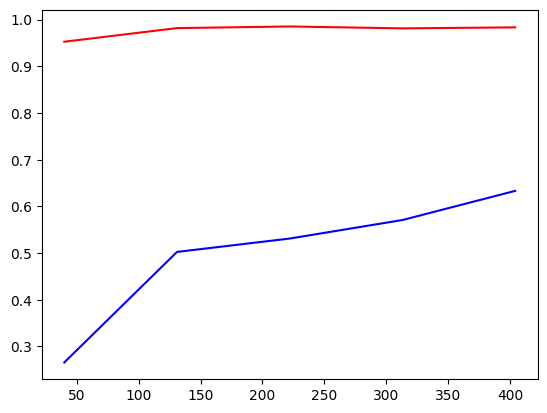

In [245]:
regression = RandomForestRegressor()
regression.fit(X, target)
regression

predicted = regression.predict(X)

train_sizes, train_scores, test_scores = learning_curve(regression, X, target, train_sizes=np.linspace(0.1, 1, 5))

ax = pyplot.subplot()
ax.plot(train_sizes, train_scores.mean(axis = 1), color='r')
ax.plot(train_sizes, test_scores.mean(axis = 1), color='b')

Можно предположить, что данная модель является недообученной. Про значение целевого показателя метрики R2 сложно что-то сказать, но можно предположить, что оно находится в диапазоне от 0.6 до 1.0

In [246]:
X_train, X_test, Y_train, Y_test = train_test_split(X, target, test_size=0.2, random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [247]:
coefficientsDictionary = {}


In [248]:
regression = LinearRegression()

regression.fit(X_train_scaled, Y_train)
coefficientsDictionary["Linear"] = regression.coef_

Y_predicted = regression.predict(X_test)

print("MAE:", mean_absolute_error(Y_test, Y_predicted))
print("MSE:", mean_squared_error(Y_test, Y_predicted))

MAE: 616.4510426779003
MSE: 496497.2299271783


c:\Users\yaggod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [249]:
regression = Ridge()

regression.fit(X_train_scaled, Y_train)
coefficientsDictionary["Ridge"] = regression.coef_

Y_predicted = regression.predict(X_test)

print("MAE:", mean_absolute_error(Y_test, Y_predicted))
print("MSE:", mean_squared_error(Y_test, Y_predicted))

MAE: 587.759520645194
MSE: 455256.7893427804


c:\Users\yaggod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


In [250]:
regression = Lasso()

regression.fit(X_train_scaled, Y_train)
coefficientsDictionary["Lasso"] = regression.coef_

Y_predicted = regression.predict(X_test)

print("MAE:", mean_absolute_error(Y_test, Y_predicted))
print("MSE:", mean_squared_error(Y_test, Y_predicted))

MAE: 96.41474746105617
MSE: 11653.47788158434


c:\Users\yaggod\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


Как можно заметить, по двум выбранным метрикам Lasso-регуляризации показала себя лучше всего. Ridge и LR показали себя примерно одинаково

In [251]:
dataframe = pandas.DataFrame.from_dict(coefficientsDictionary)
dataframe

,Linear,Ridge,Lasso
0,-0.087615,-0.095188,-0.000000
1,0.718179,0.718310,0.110763
2,0.594506,0.598719,0.000000
3,-0.970820,-0.962257,-0.000000
4,-2.880943,-2.848263,-0.000000
5,0.038311,0.011680,-0.000000
6,-3.592455,-3.576073,-3.585550
7,-1.855148,-1.820134,-0.000000
8,-2.292767,-2.283191,-1.784895
9,2.112245,2.036231,-0.000000


Как можно заметить, для Lasso регуляризации значения некоторых коэффициентов равны нулю, отчего можно сделать предположение, что соответствующие этим коэффициентам признаки необязательны для решения данной задачи